# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

You should consider upgrading via the 'c:\users\tonia\anaconda3\envs\pythondata\python.exe -m pip install --upgrade pip' command.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_keys = weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_keys}&units={units}&q="
response = requests.get(query_url + city).json()
print(response)

{'coord': {'lon': 152.43, 'lat': -3.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.08, 'feels_like': 86.65, 'temp_min': 80.08, 'temp_max': 80.08, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 5.41, 'deg': 77}, 'clouds': {'all': 100}, 'dt': 1604257505, 'sys': {'country': 'PG', 'sunrise': 1604258789, 'sunset': 1604302866}, 'timezone': 36000, 'id': 2090021, 'name': 'Namatanai', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

# Create empty lists
city_name = []
lat = []
lng= []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []
counter = 0
set_num = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# for loop cities in query_url with try and except
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
        if counter>=49:
            counter=1
            set_num+=1
            
        else:
            counter+=1
            
        print(f"Processing Record {counter} of Set {set_num} | {city}")
    except:

        print("City not found. Skipping...")
print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | springdale
Processing Record 4 of Set 1 | ahipara
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | hobart
City not found. Skipping...
City not found. Skipping...
Processing Record 7 of Set 1 | jalu
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | lyngseidet
Processing Record 10 of Set 1 | roma
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | nenjiang
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | calama
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | caravelas
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | atar
Processing Record 21 of Set 1 | constitucion
Processing Record 22 of Set 1 | lenin

Processing Record 30 of Set 8 | namikupa
Processing Record 31 of Set 8 | conde
Processing Record 32 of Set 8 | geraldton
Processing Record 33 of Set 8 | baker city
Processing Record 34 of Set 8 | padilla
Processing Record 35 of Set 8 | mattru
Processing Record 36 of Set 8 | hisai
Processing Record 37 of Set 8 | hede
Processing Record 38 of Set 8 | maragogi
Processing Record 39 of Set 8 | kahului
Processing Record 40 of Set 8 | cerrito
Processing Record 41 of Set 8 | sochi
Processing Record 42 of Set 8 | mayor pablo lagerenza
Processing Record 43 of Set 8 | kangasala
Processing Record 44 of Set 8 | bilibino
Processing Record 45 of Set 8 | gossaigaon
Processing Record 46 of Set 8 | el tular
Processing Record 47 of Set 8 | misratah
Processing Record 48 of Set 8 | aitape
Processing Record 49 of Set 8 | coahuayana
Processing Record 1 of Set 9 | saint anthony
Processing Record 2 of Set 9 | rabo de peixe
Processing Record 3 of Set 9 | komsomolskiy
Processing Record 4 of Set 9 | marsh harbour


In [6]:
len(city_name)

570

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create dictionaries for variables in API call above
cities_list = {
    "City Name": city_name,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date
}

cities_df = pd.DataFrame(cities_list)
cities_df.to_csv(r"output_data/cities.csv", index = False)
cities_df

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.79,-50.01,66.22,59,49,8.59,BR,1604257475
1,tuktoyaktuk,69.45,-133.04,6.80,92,75,10.29,CA,1604257505
2,springdale,36.19,-94.13,57.99,30,1,8.05,US,1604257506
3,ahipara,-35.17,173.17,62.87,89,100,6.53,NZ,1604257478
4,ushuaia,-54.80,-68.30,57.20,58,75,8.05,AR,1604257452
...,...,...,...,...,...,...,...,...,...
565,mercedes,-34.65,-59.43,79.00,41,0,3.00,AR,1604257648
566,umm kaddadah,13.60,26.69,86.72,18,0,14.76,SD,1604257537
567,corinto,37.94,22.96,64.00,58,10,1.01,GR,1604257501
568,teya,60.38,92.63,35.20,90,100,11.92,RU,1604257649


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
cities_df.loc[cities_df['Humidity'] >100]

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.



In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

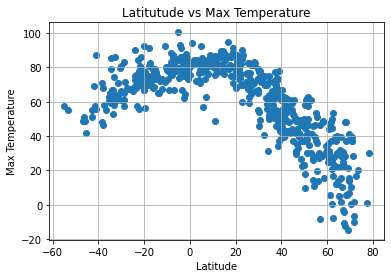

In [59]:
plt.scatter(cities_df["Latitude"], cities_df["Max Temp"])
plt.grid()
plt.title("Latitutude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig("output_data/Lat_MaxTemp.png")
plt.show()


## Latitude vs. Humidity Plot

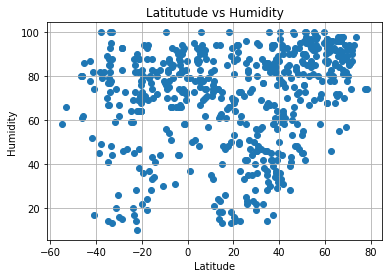

In [54]:
plt.scatter(cities_df["Latitude"], cities_df["Humidity"])
plt.grid()
plt.title("Latitutude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/Lat_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

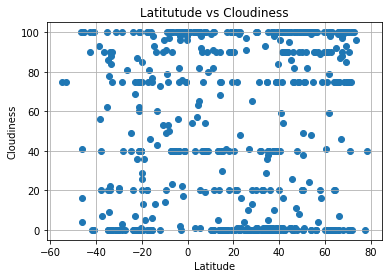

In [55]:
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"])
plt.grid()
plt.title("Latitutude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/Lat_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

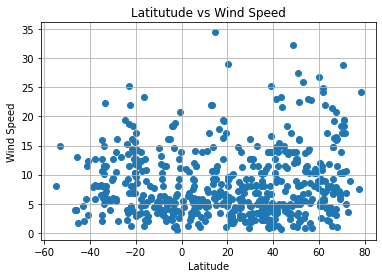

In [56]:
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"])
plt.grid()
plt.title("Latitutude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/Lat_Wind Speed.png")
plt.show()

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = cities_df.loc[cities_df["Latitude"] >= 0]
southern_hemi = cities_df.loc[cities_df["Latitude"] < 0]

In [26]:
# Define function for creating linear agression and scatter plot
def linear_plot(x_values, y_values, y_label, coordinates):
    print(f"The r-squared is : {round(st.pearsonr(x_values, y_values)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


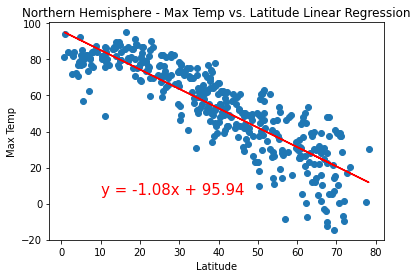

<Figure size 432x288 with 0 Axes>

In [62]:
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
x_values = northern_hemi['Latitude']
y_values = northern_hemi['Max Temp']
linear_plot(x_values, y_values,"Max Temp",(10,5))
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.68


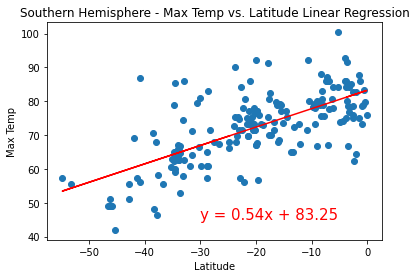

<Figure size 432x288 with 0 Axes>

In [43]:
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
x_values = southern_hemi['Latitude']
y_values = southern_hemi['Max Temp']
linear_plot(x_values, y_values,"Max Temp",(-30,45))
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.35


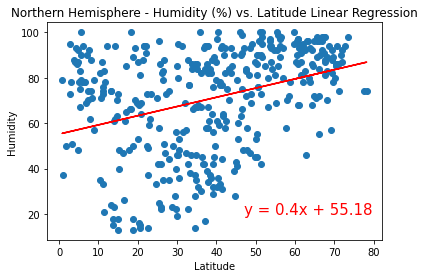

<Figure size 432x288 with 0 Axes>

In [44]:
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
x_values = northern_hemi['Latitude']
y_values = northern_hemi['Humidity']
plt.savefig("NHemi_Humidity_Lat.png")
linear_plot(x_values, y_values,"Humidity",(47,20))
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.12


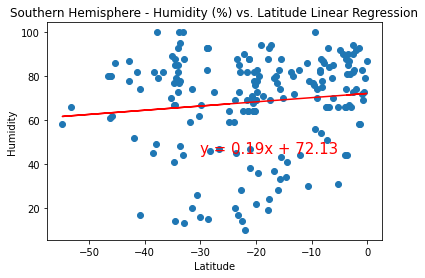

<Figure size 432x288 with 0 Axes>

In [45]:
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
x_values = southern_hemi['Latitude']
y_values = southern_hemi['Humidity']
linear_plot(x_values, y_values,"Humidity",(-30,45))
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.11


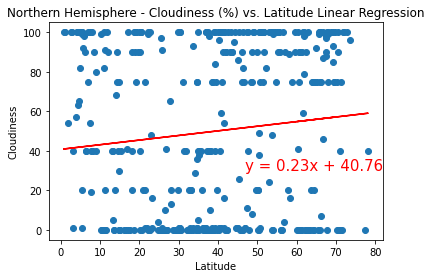

<Figure size 432x288 with 0 Axes>

In [46]:
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
x_values = northern_hemi['Latitude']
y_values = northern_hemi['Cloudiness']
linear_plot(x_values, y_values,"Cloudiness",(47,30))
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.23


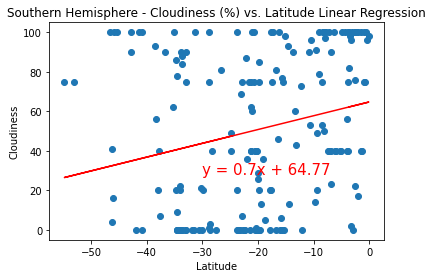

<Figure size 432x288 with 0 Axes>

In [48]:
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
x_values = southern_hemi['Latitude']
y_values = southern_hemi['Cloudiness']
linear_plot(x_values, y_values,"Cloudiness",(-30,28))
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.19


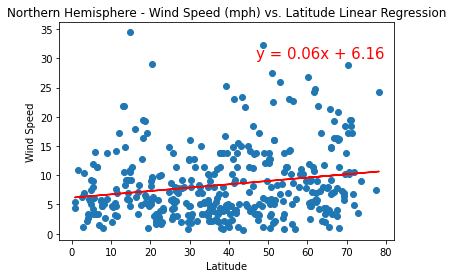

<Figure size 432x288 with 0 Axes>

In [49]:
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
x_values = northern_hemi['Latitude']
y_values = northern_hemi['Wind Speed']
linear_plot(x_values, y_values,"Wind Speed",(47,30))
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.08


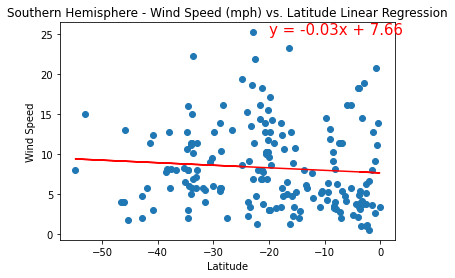

<Figure size 432x288 with 0 Axes>

In [52]:
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
x_values = southern_hemi['Latitude']
y_values = southern_hemi['Wind Speed']
linear_plot(x_values, y_values,"Wind Speed",(-20,25))
plt.savefig("output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

## Analysis and Observations

Of the four weather measures examined versus changes in latitude the strongest correlation was found between Northern Hemisphere changes in latitude versus temperature. This relationship had a high r-squared value of -0.87 meaning that 87% of the variance in this data could be explained by the equation of the line from linear regression.

Some observable trends based on linear regression data:

* Max temperature increases as you move north from the equator.
* In the Northern Hemisphere Humidity is weakly correlated to increase as you increase in latitude.
* In the Southern Hemisphere Humidity is weakly correlated to decrease as you move south in latitude.
* Cloudiness is not correlated to latitude in the Northern Hemisphere.
* Cloudiness is weakly correlated as you move south in latitude in the Southern Hemisphere.
* Wind Speed is not correlated to latitude in the Northern Hemisphere.
* In the Southern Hemisphere, Wind Speed is weakly correlated to increase as you move south in latitude.